In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1, 3], [2, 2], [3, 2], [4, 1], [4, 2], 
              [2, 6], [4, 6], [3, 7], [2, 8], [1, 9],
              [8, 6], [9, 7], [7, 9], [10, 6], [8, 9],
              [8, 4], [9, 1], [10, 3], [8, 3], [9, 3]])
y = np.ones(20)
y[:5] = 0

In [2]:
def gini(t,v):
    n=t+v
    if n==0:
        return 0
    gin=1-((t/n)**2+(v/n)**2)
    return gin


In [5]:
L=[]
def find(X,y):
    M=[]
    for i in range(1,11):
        posi=y[X>i]
        gin1=gini(len(posi[posi==0]),len(posi[posi==1]))

        negi=y[X<=i]
        gin2=gini(len(negi[negi==0]),len(negi[negi==1]))

        gini_index= gini(5,15)-gin1*len(posi)/X.shape[0]-gin2*len(negi)/X.shape[0]
        M.append([i,gini_index])
    L.append(M)
    return L

X1=X[:,0]
X2=X[:,1]
#L1=find(X1,y)
L2=find(X2,y)
 
    

In [6]:
def find_divi(L,l):
    max1=L[0][0][1]
    for i in range(1,10):
        if L[0][i][1]>=max1:
            max1=L[0][i][1]
        continue
    ele1=[]
    ele2=[]
    for J in range(0,10):
        if L[0][J][1]==max1:
            ele1.append(J+1)
        if l[0][J][1]==max1:
            ele2.append(J+1)
    return ele1,ele2


def abc(a):
    A=[]
    B=[]
    for i in a[0]:
        if len(X[X[:,0]==i])==0:
            A.append(i)
    for j in a[1]:
        if len(X[X[:,1]==j])==0:
            B.append(j)
    return  A, B
a=find_divi(L1,L2)
b=abc(a)


In [7]:
def classi(data):
    if data[0]>b[0][0] or data[0]>b[0][1]:
        return 1
    else:
        if data[1]<=b[1]:
             return 0
x=np.array([2,3])  
classi(x)    

0

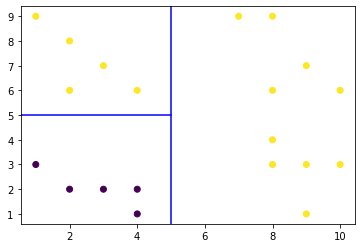

In [8]:
fig = plt.figure()
ax = plt.axes()
plt.scatter(X[:, 0], X[:, 1], c=y)

plt.axvline(x=b[0][0], ymin=0, ymax=1, color='b', lw=1.5, label='boudary')
plt.axhline(y=b[1], xmin=0, xmax=0.45, color='b', lw=1.5)
plt.show()

In [9]:
import pandas as pd
X=pd.read_csv('salary.csv')
Y=X['Cho vay']
X=X.drop(labels='Cho vay',axis=1)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_stand = scaler.fit_transform(X)
cols = ['Lương','Thời gian làm việc']
X=pd.DataFrame(data=X_stand,columns=cols)


In [14]:
L=[]
d=[-1,-0.5,0,0.5,1,1.5,2]
def find(X,y):
    M=[]
    for i in d  :
        posi=y[X>i]
        gin1=gini(len(posi[posi==0]),len(posi[posi==1]))

        negi=y[X<=i]
        gin2=gini(len(negi[negi==0]),len(negi[negi==1]))

        gini_index= gini(10,10)-gin1*len(posi)/X.shape[0]-gin2*len(negi)/X.shape[0]
        M.append([i,gini_index])
    L.append(M)
    return L

X1=X['Lương']
X2=X['Thời gian làm việc']
L1=find(X1,y)
#L2=find(X2,y)
 
    

In [15]:
def find_divi(L,l):
    max1=L[0][0][1]
    max2=l[0][0][1]
    for i in range(0,7):
        if L[0][i][1]>=max1:
            max1=L[0][i][1]
        continue
    ele1=[]
    ele2=[]
    for J in range(0,7):
        if L[0][J][1]==max1:
            ele1.append(L[0][J][0])
        if l[0][J][1]>=0.17 and l[0][J][1] <=max1:
            ele2.append(l[0][J][0])
    return  ele1,ele2

def abc(a):
    A=[]
    B=[]
    for i in a[0]:
        if len(X[X['Lương']==i])==0:
            A.append(i)
    for j in a[1]:
        if len(X[X['Thời gian làm việc']==j])==0:
            B.append(j)
    return  A, B
d=find_divi(L1,L2)
b=abc(d)

In [16]:
from sklearn.preprocessing import normalize
def classi(data):
    if data[0]>b[0][0] or data[0]>b[0][1]:
        return 1
    else:
        if data[1]<=b[1][1]:
             return 0
        return 1
x=np.array([2,3])
normalize(x[:,np.newaxis], axis=0).ravel()
classi(x)    

1

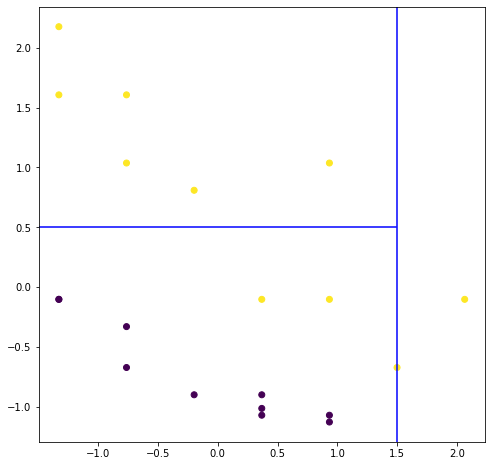

In [18]:
plt.figure(figsize=(8, 8))
plt.scatter(X['Lương'],X['Thời gian làm việc'] ,c=Y)


plt.axvline(x=b[0][0], ymin=0, ymax=1, color='b', lw=1.5, label='boudary')
plt.axhline(y=b[1][1], xmin=0, xmax=0.8, color='b', lw=1.5)
plt.show()
